In [0]:
import tensorflow as ts
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [0]:
mnist = keras.datasets.fashion_mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [0]:
class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat",'Sandal',"Shirt","Sneaker","Bag","Ankle Boot"]

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))#softmax e sigmoid são para problemas com 2+ categorias

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [0]:
history = model.fit(X_train,y_train,epochs=15,batch_size=100,validation_split=.2)

Epoch 1/15
480/480 [==============================] - 2s 4ms/step - loss: 0.5698 - accuracy: 0.8029 - val_loss: 0.4441 - val_accuracy: 0.8418
Epoch 2/15
480/480 [==============================] - 2s 3ms/step - loss: 0.4163 - accuracy: 0.8536 - val_loss: 0.3991 - val_accuracy: 0.8618
Epoch 3/15
480/480 [==============================] - 2s 5ms/step - loss: 0.3692 - accuracy: 0.8692 - val_loss: 0.3764 - val_accuracy: 0.8708
Epoch 4/15
480/480 [==============================] - 2s 3ms/step - loss: 0.3444 - accuracy: 0.8762 - val_loss: 0.3565 - val_accuracy: 0.8733
Epoch 5/15
480/480 [==============================] - 2s 3ms/step - loss: 0.3238 - accuracy: 0.8836 - val_loss: 0.3689 - val_accuracy: 0.8684
Epoch 6/15
480/480 [==============================] - 2s 4ms/step - loss: 0.3072 - accuracy: 0.8880 - val_loss: 0.3347 - val_accuracy: 0.8813
Epoch 7/15
480/480 [==============================] - 2s 3ms/step - loss: 0.2943 - accuracy: 0.8913 - val_loss: 0.3390 - val_accuracy: 0.8825
Epoch 

In [0]:
from sklearn.metrics import accuracy_score
import numpy as np

In [0]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8825
Out[20]: [0.34261807799339294, 0.8824999928474426]

In [0]:
y_pred = np.argmax(model.predict(X_test),axis=1)
#y_pred = np.argmax(y_pred,axis=1)
accuracy_score(y_test,y_pred)

Out[26]: 0.8825

In [0]:
import matplotlib.pyplot as plt

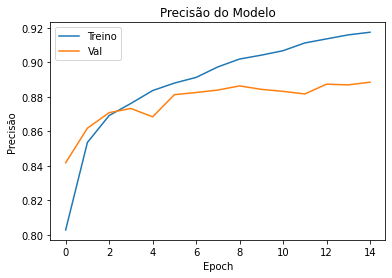

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<command-2762569804174441> in <module>
      6 plt.xlabel("Epoch")
      7 plt.legend(["Treino","Val"],loc="upper left")
----> 8 plt.figaspect((12,8))
      9 plt.show()
     10 

/databricks/python/lib/python3.8/site-packages/matplotlib/figure.py in figaspect(arg)
   3225 
   3226     # New size for the figure, keeping the aspect ratio of the caller
-> 3227     newsize = np.array((fig_height / arr_ratio, fig_height))
   3228 
   3229     # Sanity checks, don't drop either dimension below figsize_min

TypeError: unsupported operand type(s) for /: 'float' and 'tuple'

In [0]:
#Plota os valores da precisão do treino e da validação 
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title("Precisão do Modelo")
plt.ylabel("Precisão")
plt.xlabel("Epoch")
plt.legend(["Treino","Val"],loc="upper left")
plt.show()

#Plota os valores da fubnção de perda do treino e da validação 
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("Perda do Modelo")
plt.ylabel("Perda")
plt.xlabel("Epoch")
plt.legend(["Treino","Val"],loc="upper left")
plt.show()

In [0]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 5.0 MB/s 
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib

In [0]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

findfont: Font family ['lobster'] not found. Falling back to DejaVu Sans.


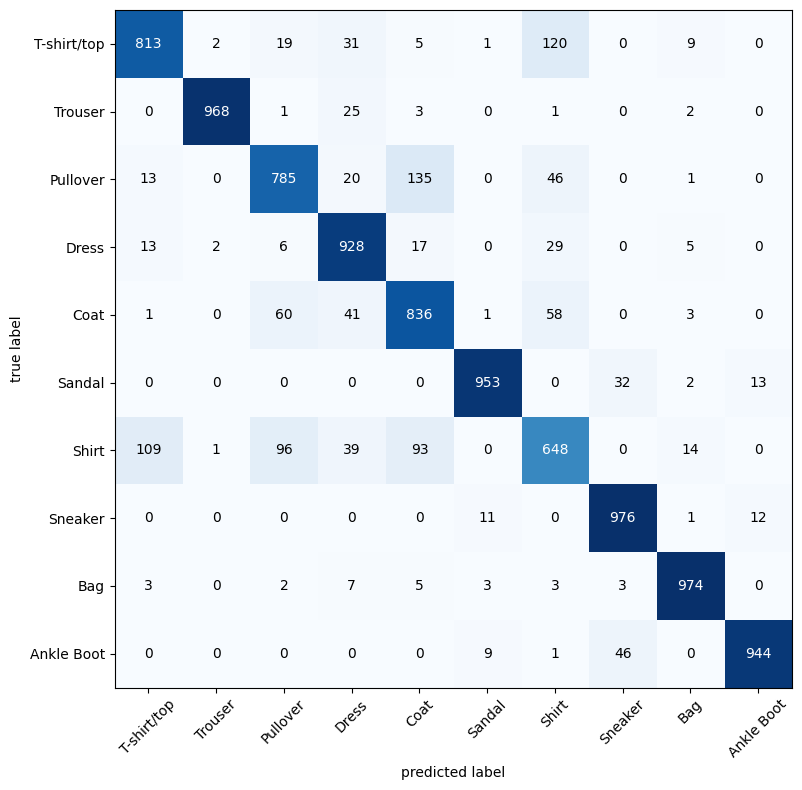

In [0]:
plt.rc("font",family="lobster")

mat = confusion_matrix(y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(12,8), class_names=class_name, show_normed=False)
plt.tight_layout()
fig.savefig("cm.png")